In [67]:
import numpy as np
import nibabel as nib
import os
from matplotlib import pyplot as plt

In [68]:
def generate_img(img, mask, splice, c=0.2):
    gray = np.stack((img[:,:,splice],)*3, axis=-1)
    mask_s = mask[:,:,splice]
    r = np.where(mask_s == 1, 1.0, 0)
    g = np.where(mask_s == 2, 1.0, 0)
    b = np.where(mask_s == 3, 1.0, 0)
    rgb = np.stack((r,g,b), axis=-1)
    return (1-c)*gray + c*rgb

BASE_DIR = "/home/quadm/Documents/sjsu/CMPE-297A/Project"

# Where to grab the NII Files from
gt_dir = os.path.join(BASE_DIR, "GT/nii")
pred_dir = os.path.join(BASE_DIR, "CrossEnt/nii")

# Where to save the images to
gt_img_dir = os.path.join(BASE_DIR, "GT/img")
pred_img_dir = os.path.join(BASE_DIR, "CrossEnt/img")

write = True
write_gts = True

for ex in os.listdir(os.path.join(BASE_DIR, pred_dir)):
    f = ex[:-7]
    fname = f + ".nii.gz"
    gt_fname = f + "_gt.nii.gz"
    
    orig_img = nib.load(os.path.join(gt_dir, fname)).dataobj
    gt_img = nib.load(os.path.join(gt_dir, gt_fname)).dataobj
    pred_img = nib.load(os.path.join(pred_dir, fname)).dataobj
    
    w, h, splices = pred_img.shape
    
    for i in range(splices):
        if write_gts:
            cv2.imwrite(os.path.join(gt_img_dir, f + "_" + str(i) + "_gt.png"),
                        255*generate_img(orig_img, gt_img, i))
        if write:
            cv2.imwrite(os.path.join(pred_img_dir, f + "_" + str(i) + ".png"),
                        255*generate_img(orig_img, pred_img, i))


True

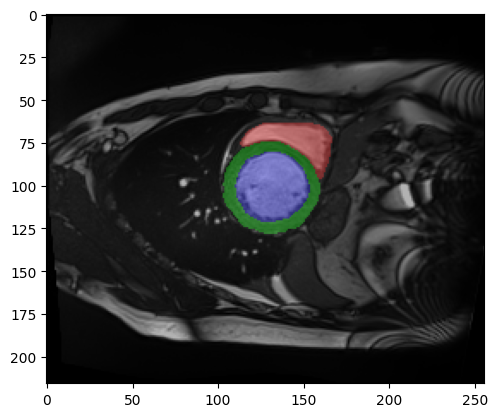

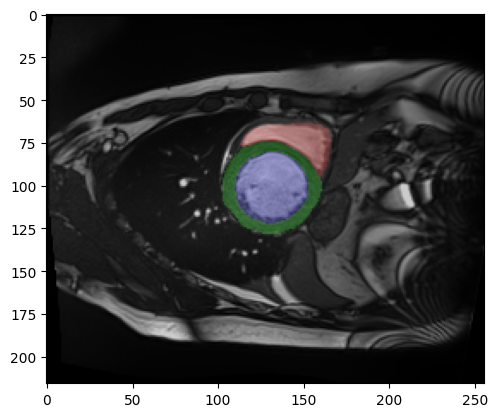

In [44]:
plt.imshow(generate_img(orig_img, pred_img, 3))